In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
user_data = pd.read_csv('/Users/gena2/Desktop/KarpovCourses/lesson3_pandas/mini_project_pandas_/3_user_data.csv')
logs = pd.read_csv('/Users/gena2/Desktop/KarpovCourses/lesson3_pandas/mini_project_pandas_/3_logs.csv')

In [4]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [42]:
success_counts = logs.loc[logs.success ==True].client.value_counts()

In [43]:
success_counts

52870    41
61473    41
92584    41
12179    41
82563    41
         ..
27995     1
40285     1
1374      1
77857     1
51199     1
Name: client, Length: 2845, dtype: int64

In [44]:
max_num = success_counts.max()

In [46]:
max_success_users = success_counts.loc[success_counts == max_num]

In [47]:
max_success_users

52870    41
61473    41
92584    41
12179    41
82563    41
28719    41
61468    41
78349    41
36165    41
Name: client, dtype: int64

In [48]:
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

In [64]:
popular_platform = logs.query('success == True').groupby('platform').agg({"success":'count'})

In [65]:
popular_platform.idxmax()

success    phone
dtype: object

In [66]:
total_df = logs.merge(user_data, on='client')

In [67]:
total_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [83]:
total_df.query('premium == True' ).groupby('platform',as_index=False).agg({"success":'count'})

,platform,success
0,computer,150
1,phone,246
2,tablet,24


In [85]:
non_premium_clients = total_df.query('premium == False')
premium_clients = total_df.query('premium == True')

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

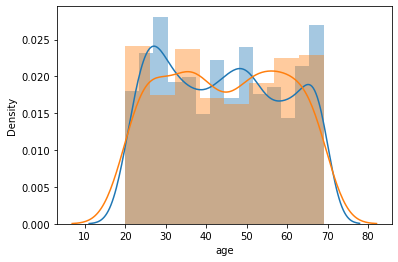

In [92]:
sns.distplot(non_premium_clients.age)
sns.distplot(premium_clients.age)

In [111]:
total_df['success_operations'
] = total_df.query('success == True').groupby('client').agg({'client' : 'count'})

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


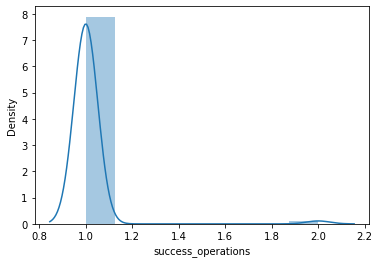

In [112]:
ax = sns.distplot(total_df.success_operations)

In [127]:
df_computer = total_df.query('platform== "computer"').agg({"success":'count'})

In [128]:
df_computer

success    1140
dtype: int64

In [130]:
del total_df['success_operations']

In [131]:
total_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


<AxesSubplot:xlabel='age', ylabel='count'>

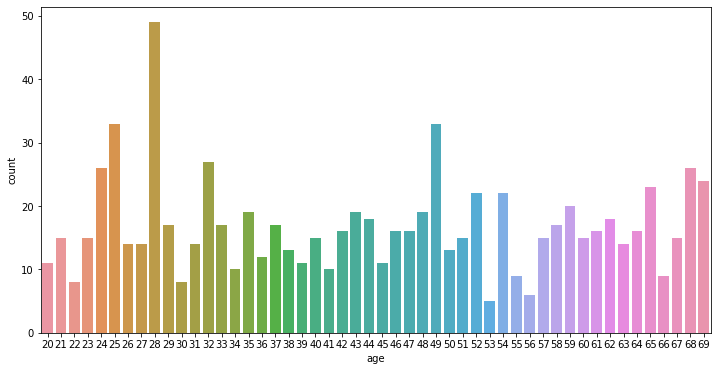

In [137]:
plt.figure(figsize=(12,6))
sns.countplot(data=total_df.query('platform == "computer" and success == True'),x='age')